## Example script
Takes you through the basics of generating the paper's figures and simulations. 
#### Load dependencies and other problem constants

In [1]:
push!(LOAD_PATH, "../src/")
using Pairwise, Multiagent

d = get_pomdp()
g = get_grid(d.pomdp.states)

RectangleGrid with 2420 points

### Pairwise encounter
The code here generates the QMDP approximate solution to the pairwise encounter and visualizes the policy.
#### Solve for pairwise encounter policy
Generation of pairwise encounter policy takes a few minutes. Comment out gen_pairwise_policy line to use pre-computed policy datafile for the next part

In [2]:
# gen_pairwise_policy(d)
alpha = read_alpha()

2421x25 Array{Float64,2}:
 -16.0     -10.0     -8.0      -10.0     …  -8.0      -10.0     -16.0   
 -16.0105  -10.0     -8.0002   -10.0        -8.0      -10.0     -16.003 
 -16.0431  -10.0202  -8.00218  -10.0        -8.00205  -10.0     -16.0243
 -16.0928  -10.1854  -8.00731  -10.0015     -8.00978  -10.009   -16.1302
 -16.2748  -10.4471  -8.01766  -10.0137     -8.02836  -10.1355  -16.1846
 -16.8975  -10.6922  -8.05614  -10.0215  …  -8.15972  -10.2243  -16.1939
 -16.6292  -10.7363  -8.08591  -10.0212     -8.13377  -10.2592  -16.0487
 -16.478   -10.0972  -8.08755  -10.0158     -8.13681  -10.1689  -16.0167
 -16.1676  -10.0     -8.08361  -10.0006     -8.10948  -10.0049  -16.0075
 -16.0437  -10.0     -8.02947  -10.0        -8.0      -10.0     -16.0014
 -16.0     -10.0     -8.01313  -10.0     …  -8.0      -10.0     -16.0   
 -16.0634  -10.0     -8.0      -10.0        -8.0      -10.0     -16.001 
 -16.3018  -10.0     -8.00332  -10.0        -8.02372  -10.0     -16.0622
   ⋮                     

#### Visualize policy as heatmap

Slider{Float64}([Input{Float64}] 180.0,"p",180.0,0.0:90.0:360.0)

Slider{Float64}([Input{Float64}] 10.0,"v0",10.0,10.0:10.0:20.0)

Slider{Float64}([Input{Float64}] 10.0,"v1",10.0,10.0:10.0:20.0)

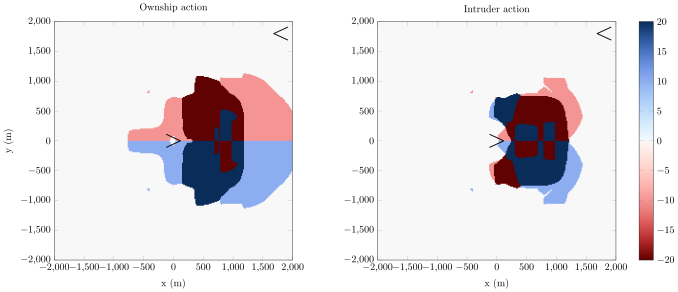

In [3]:
viz_pairwise_policy(d)

### Multithreat coordination
The code here uses the pairwise encounter solution from above to generate locally optimal policies in real-time. Basic visualization and trajectory simulation and plotting are demonstrated below.
#### Visualize example three-aircraft encounter policy heatmap
Note that iutilFn = 1 correponds to the max-sum policy, and that iutilFn = 2 corresponds to the max-min policy.

Slider{Int64}([Input{Int64}] 1,"iutilFn",1,1:2)

Slider{Int64}([Input{Int64}] 180,"p",180,0:30:360)

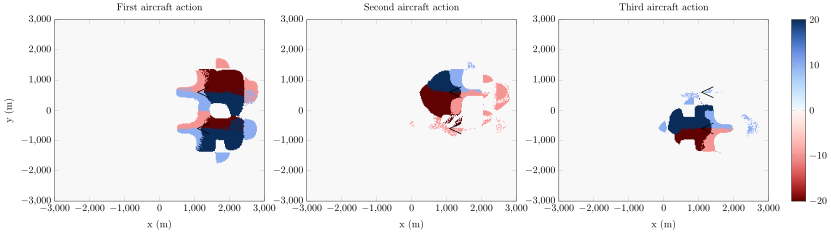

In [4]:
viz_policy(alpha, g)

#### Four-aircraft encounter simulation with trajectory visualization
Change the arguments to the desired coordination or baseline algorithm and utility function.

number of collisions = 0, average decision time = 3.937e-01 ms

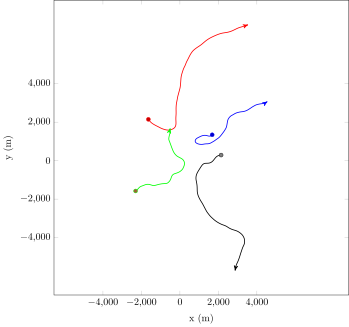

In [5]:
algorithm = utm # input utm, uncrd, coord, naive (closest-threat), or distr
utility = maxmin # input maxmin or maxsum
plot_trajs(algorithm, utility, alpha, g)

#### Bulk stress tests

In [3]:
nuavs = 2:5
nsim = 10
bulk_test(nuavs, nsim, alpha, g)

beginning stress tests...
nuavs = 2: cputime = 5.13e-01 sec
maxmin nlms: [0,0,0,0,0]
maxmin nlms bool: [0,0,0,0,0]
average maxmin times: [0.0011114661539999998,0.0003201381979999996,0.00011867227299999997,0.000170255667,4.727391199999998e-5]
maxsum nlms: [0,0,0,0,0]
maxsum nlms bool: [0,0,0,0,0]
average maxsum times: [6.085578e-5,9.976159900000003e-5,0.00010519592800000003,1.4321954e-5,6.1195272e-5]
nuavs = 3: cputime = 8.73e-01 sec
maxmin nlms: [0,0,0,96,0]
maxmin nlms bool: [0,0,0,1,0]
average maxmin times: [3.9755135000000004e-5,9.795927199999997e-5,0.000258922,2.4757516e-5,0.00012334932299999996]
maxsum nlms: [0,0,0,0,0]
maxsum nlms bool: [0,0,0,0,0]
average maxsum times: [4.586505e-5,0.00018389505000000002,0.00020136676500000003,2.3382886e-5,5.1701046000000004e-5]
nuavs = 4: cputime = 1.18e+00 sec
maxmin nlms: [0,0,0,190,0]
maxmin nlms bool: [0,0,0,5,0]
average maxmin times: [0.00011573303600000002,0.00021299005999999996,0.000475301581,3.5357582999999995e-5,0.00011111244300000001]